In [1193]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,cross_val_predict
from sklearn.preprocessing import StandardScaler

In [1194]:
df=pd.read_excel("/Users/lav/Downloads/Student Applications & Performance.xlsx")

# Data Preprocessing

**Null Values-(columns-nulls-column_length-datatype)

In [1195]:
for i in df.columns:
    print(i," ",df[i].isnull().sum(),"  ", len(df["STDNT_AGE"]),"  ", df[i].dtype)

STUDENT IDENTIFIER   0    3400    int64
STDNT_AGE   0    3400    int64
STDNT_GENDER   0    3400    object
STDNT_BACKGROUND   0    3400    object
IN_STATE_FLAG   0    3400    object
INTERNATIONAL_STS   0    3400    object
STDNT_MAJOR   0    3400    object
STDNT_MINOR   0    3400    object
STDNT_TEST_ENTRANCE1   2294    3400    float64
STDNT_TEST_ENTRANCE2   908    3400    float64
STDNT_TEST_ENTRANCE_COMB   518    3400    float64
FIRST_TERM   0    3400    int64
CORE_COURSE_NAME_1_F   0    3400    object
CORE_COURSE_GRADE_1_F   0    3400    object
CORE_COURSE_NAME_2_F   99    3400    object
CORE_COURSE_GRADE_2_F   99    3400    object
CORE_COURSE_NAME_3_F   565    3400    object
CORE_COURSE_GRADE_3_F   565    3400    object
CORE_COURSE_NAME_4_F   1597    3400    object
CORE_COURSE_GRADE_4_F   1597    3400    object
CORE_COURSE_NAME_5_F   2755    3400    object
CORE_COURSE_GRADE_5_F   2755    3400    object
CORE_COURSE_NAME_6_F   3272    3400    object
CORE_COURSE_GRADE_6_F   3272    3400 

# Getting Rid of the Null Values

In [1196]:
columns=["SECOND_TERM_EARNED_HRS","SECOND_TERM_ATTEMPT_HRS","MOTHER_HI_EDU_CD","FATHER_HI_EDU_CD","HIGH_SCHL_GPA"
        ,"DISTANCE_FROM_HOME","STDNT_TEST_ENTRANCE_COMB"]

In [1197]:
for i in columns:
    df[i]=df[i].replace(np.nan,df[i].mean())

# Dealing with Categorial Variables

In [1198]:
columns=["CORE_COURSE_GRADE_1_F","CORE_COURSE_GRADE_2_F","CORE_COURSE_GRADE_3_F"]

In [1199]:
for i in columns:
    df[i]=df[i].replace({"A":5,"B":4,"C":3,"D":2,"F":1,"INCOMPL":0,"NOT REP":0})

In [1200]:
columns=["CORE_COURSE_GRADE_4_F"]
for i in columns:
    df[i]=df[i].replace({"A":5,"B":4,"C":3,"D":2,"F":1,"INCOMPL":0})

In [1201]:
columns=["CORE_COURSE_GRADE_5_F","CORE_COURSE_GRADE_6_F"]
for i in columns:
    df[i]=df[i].replace({"A":5,"B":4,"C":3,"D":2})

In [1202]:
columns=["CORE_COURSE_GRADE_2_S","CORE_COURSE_GRADE_3_S"]
for i in columns:
    df[i]=df[i].replace({"A":5,"B":4,"C":3,"D":2,"F":1,"INCOMPL":0})
columns=["CORE_COURSE_GRADE_1_S"]
for i in columns:
    df[i]=df[i].replace({"A":5,"B":4,"C":3,"D":2,"F":1,"INCOMPL":0,"NOT REP":0,"Unknown":0})
columns=["CORE_COURSE_GRADE_4_S","CORE_COURSE_GRADE_5_S"]
for i in columns:
    df[i]=df[i].replace({"A":5,"B":4,"C":3,"D":2,"F":1})

**Hence we may drop CORE_COURSE_GRADE_6_S,CORE_COURSE_GRADE_6_F,CORE_COURSE_GRADE_5_F,CORE_COURSE_GRADE_6_S

# EDA

In [1049]:
columns=["CORE_COURSE_GRADE_1_S","CORE_COURSE_GRADE_1_F","CORE_COURSE_GRADE_2_F","CORE_COURSE_GRADE_3_F"
        ,"CORE_COURSE_GRADE_4_F","CORE_COURSE_GRADE_5_F","CORE_COURSE_GRADE_6_F"
        ,"CORE_COURSE_GRADE_2_S","CORE_COURSE_GRADE_3_S","CORE_COURSE_GRADE_4_S"
        ,"CORE_COURSE_GRADE_5_S"]

In [1203]:
a=(df["RETURNED_2ND_YR"].value_counts()[0])/(df["RETURNED_2ND_YR"].value_counts()[0]+df["RETURNED_2ND_YR"].value_counts()[1])

In [1204]:
df["STDNT_BACKGROUND"].value_counts()

BGD 1    2082
BGD 3     947
BGD 4     139
BGD 2     106
BGD 6      94
BGD 7      19
BGD 5       8
BGD 8       5
Name: STDNT_BACKGROUND, dtype: int64

In [1205]:
df_dropped=df[df["RETURNED_2ND_YR"]==0]
df_continued=df[df["RETURNED_2ND_YR"]==1]

In [1306]:
categorial_variables=[]
for i in df.columns:
    if len(df[i].value_counts())<=10:
        categorial_variables.append(i)

In [1307]:
categorial_variables

['STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'FIRST_TERM',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_GRADE_4_F',
 'SECOND_TERM',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_GRADE_2_S',
 'CORE_COURSE_GRADE_3_S',
 'CORE_COURSE_GRADE_4_S',
 'HOUSING_STS',
 'RETURNED_2ND_YR',
 'FATHER_HI_EDU_CD',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_CD',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC']

In [1308]:
del categorial_variables[4]
del categorial_variables[8]
del categorial_variables[13]                     

In [1309]:
categorial_variables

['STDNT_GENDER',
 'STDNT_BACKGROUND',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_GRADE_4_F',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_GRADE_2_S',
 'CORE_COURSE_GRADE_3_S',
 'CORE_COURSE_GRADE_4_S',
 'HOUSING_STS',
 'FATHER_HI_EDU_CD',
 'FATHER_HI_EDU_DESC',
 'MOTHER_HI_EDU_CD',
 'MOTHER_HI_EDU_DESC',
 'DEGREE_GROUP_CD',
 'DEGREE_GROUP_DESC']

In [1310]:
print("Ratio of no of returned students vs no of non-returned students in dataset -",a)
for j in categorial_variables:
    print(j)
    try:     
        for i in range(len(df[j].value_counts())):
            drop_rate=df_dropped[j].value_counts()[i]/df[j].value_counts()[i]
            print(df[j].value_counts().index[i],"",drop_rate)
    except:
        try:
            for i in range (len(df[j].value_counts())-1):
                drop_rate=df_dropped[j].value_counts()[i+1]/df[j].value_counts()[i+1]
                print(df[j].value_counts().index[i],"",df[j].value_counts()[i+1],drop_rate)
        except:
            try:
                for i in range (len(df[j].value_counts()-2)):
                    drop_rate=df_dropped[j].value_counts()[i+2]/df[j].value_counts()[i+2]
                    print(df[j].value_counts().index[i],"",df[j].value_counts()[i+2],drop_rate)
            except:
                print("")

Ratio of no of returned students vs no of non-returned students in dataset - 0.2126470588235294
STDNT_GENDER
F  0.2219626168224299
M  0.19682539682539682
STDNT_BACKGROUND
BGD 1  0.22910662824207492
BGD 3  0.1795142555438226
BGD 4  0.18705035971223022
BGD 2  0.22641509433962265
BGD 6  0.14893617021276595
BGD 7  0.3684210526315789
BGD 5  0.5
BGD 8  0.2
IN_STATE_FLAG
Y  0.2069866144302971
N  0.26409495548961426
INTERNATIONAL_STS
N  0.2107915801956715
Y  0.4444444444444444
CORE_COURSE_GRADE_1_F
3  0.2074074074074074
4  0.3522727272727273
2  0.27695167286245354
1  0.1982421875
5  0.1381509032943677
0  0.18012422360248448
CORE_COURSE_GRADE_2_F
4.0  0.2857142857142857
3.0  0.4634146341463415
5.0  0.2842465753424658
2.0  0.2691823899371069
1.0  0.17475728155339806
0.0  0.15167785234899328
CORE_COURSE_GRADE_3_F
4.0  28 0.6428571428571429
5.0  103 0.36893203883495146
3.0  416 0.28846153846153844
2.0  1155 0.21212121212121213
1.0  1132 0.16431095406360424
CORE_COURSE_GRADE_4_F
5.0  4 0.25
4.0  27

In [1216]:
import seaborn as sns

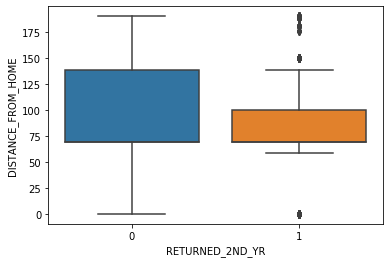

In [1217]:
sns.boxplot(df["RETURNED_2ND_YR"],df[df["DISTANCE_FROM_HOME"]<200]["DISTANCE_FROM_HOME"])

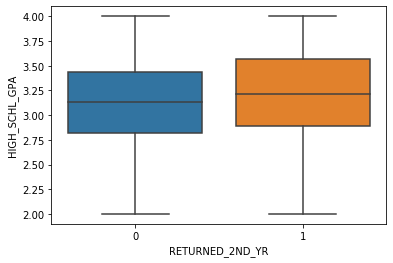

In [1220]:
sns.boxplot(df["RETURNED_2ND_YR"],df[df["HIGH_SCHL_GPA"]>=2]["HIGH_SCHL_GPA"])

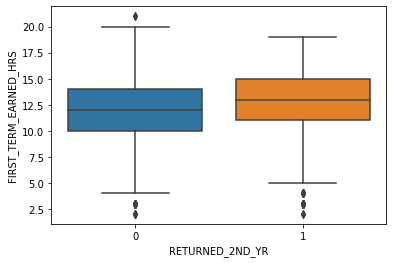

In [1221]:
sns.boxplot(df["RETURNED_2ND_YR"],df[df["FIRST_TERM_EARNED_HRS"]>=2]["FIRST_TERM_EARNED_HRS"])

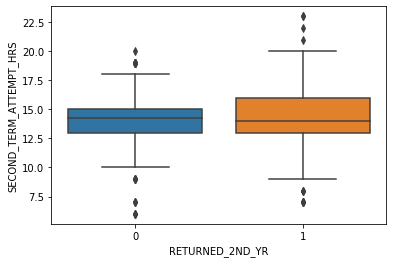

In [1235]:
sns.boxplot(df["RETURNED_2ND_YR"],df[df["SECOND_TERM_ATTEMPT_HRS"]>=5]["SECOND_TERM_ATTEMPT_HRS"])

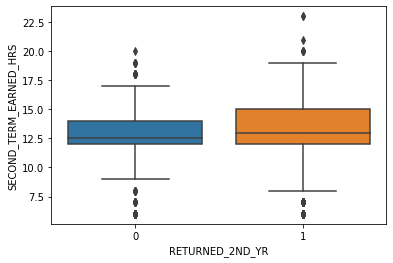

In [1236]:
sns.boxplot(df["RETURNED_2ND_YR"],df[df["SECOND_TERM_EARNED_HRS"]>=6]["SECOND_TERM_EARNED_HRS"])

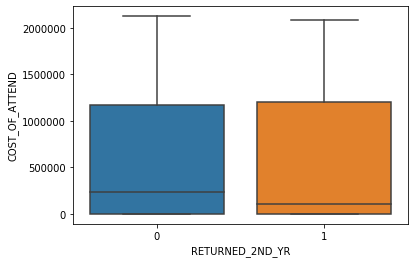

In [1237]:
sns.boxplot(df["RETURNED_2ND_YR"],df["COST_OF_ATTEND"])

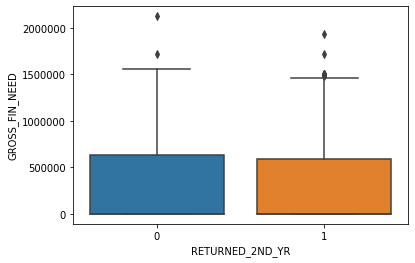

In [1238]:
sns.boxplot(df["RETURNED_2ND_YR"],df["GROSS_FIN_NEED"])

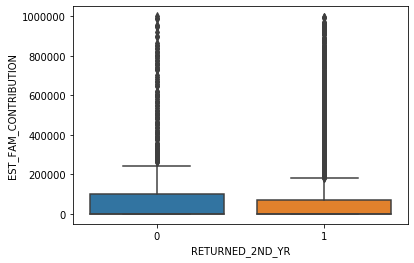

In [1245]:
sns.boxplot(df["RETURNED_2ND_YR"],df[df["EST_FAM_CONTRIBUTION"]<=1000000]["EST_FAM_CONTRIBUTION"])

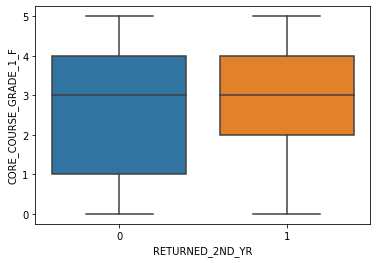

In [1246]:
sns.boxplot(df["RETURNED_2ND_YR"],df["CORE_COURSE_GRADE_1_F"])

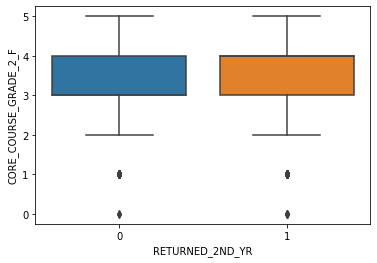

In [1247]:
sns.boxplot(df["RETURNED_2ND_YR"],df["CORE_COURSE_GRADE_2_F"])

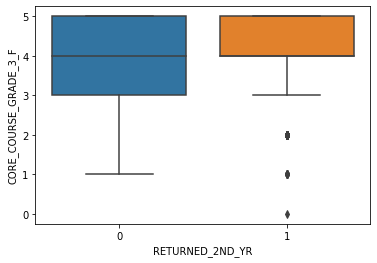

In [1248]:
sns.boxplot(df["RETURNED_2ND_YR"],df["CORE_COURSE_GRADE_3_F"])

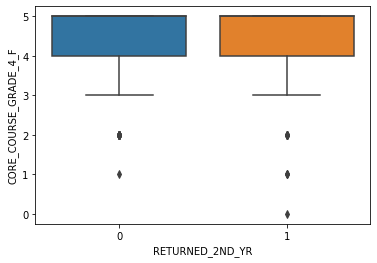

In [1249]:
sns.boxplot(df["RETURNED_2ND_YR"],df["CORE_COURSE_GRADE_4_F"])

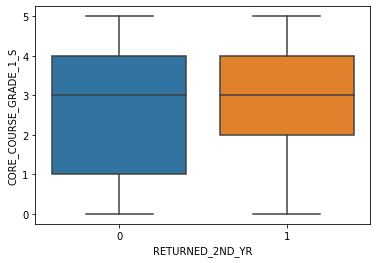

In [1253]:
sns.boxplot(df["RETURNED_2ND_YR"],df["CORE_COURSE_GRADE_1_S"])

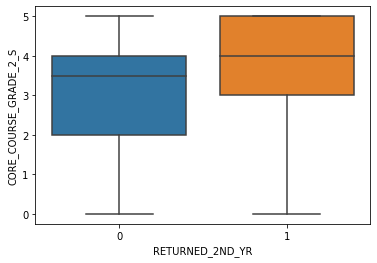

In [1252]:
sns.boxplot(df["RETURNED_2ND_YR"],df["CORE_COURSE_GRADE_2_S"])

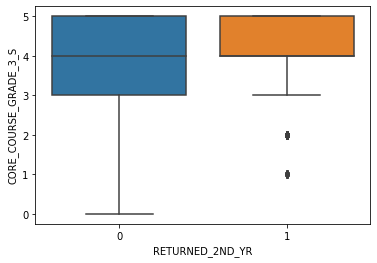

In [1254]:
sns.boxplot(df["RETURNED_2ND_YR"],df["CORE_COURSE_GRADE_3_S"])

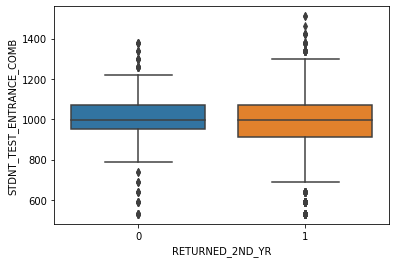

In [1313]:
sns.boxplot(df["RETURNED_2ND_YR"],df["STDNT_TEST_ENTRANCE_COMB"])

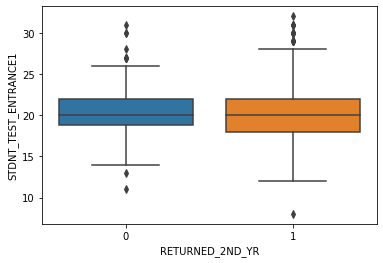

In [1259]:
sns.boxplot(df["RETURNED_2ND_YR"],df["STDNT_TEST_ENTRANCE1"])

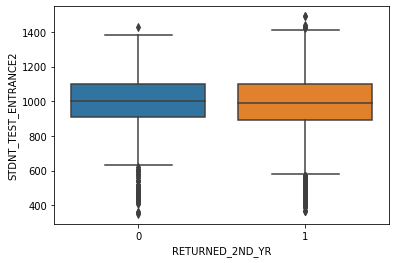

In [1261]:
sns.boxplot(df["RETURNED_2ND_YR"],df["STDNT_TEST_ENTRANCE2"])

# Checking whether any of the student major has highest contribution in dropping out of the students

In [1262]:
sto=df["STDNT_MAJOR"].value_counts()

In [1263]:
stn=df_dropped["STDNT_MAJOR"].value_counts()

In [1264]:
df_test=pd.DataFrame()

In [1266]:
df_test["total"]=sto
df_test["dropped"]=stn

In [1267]:
df_test["difference"]=df_test["total"]-df_test["dropped"]

In [1268]:
df_test["drop_per"]=(df_test["dropped"]*100)/df_test["total"]

In [1270]:
df_test=df_test.sort_values(by="drop_per",ascending=False)

In [1279]:
df_test=df_test[df_test["drop_per"]>=25]

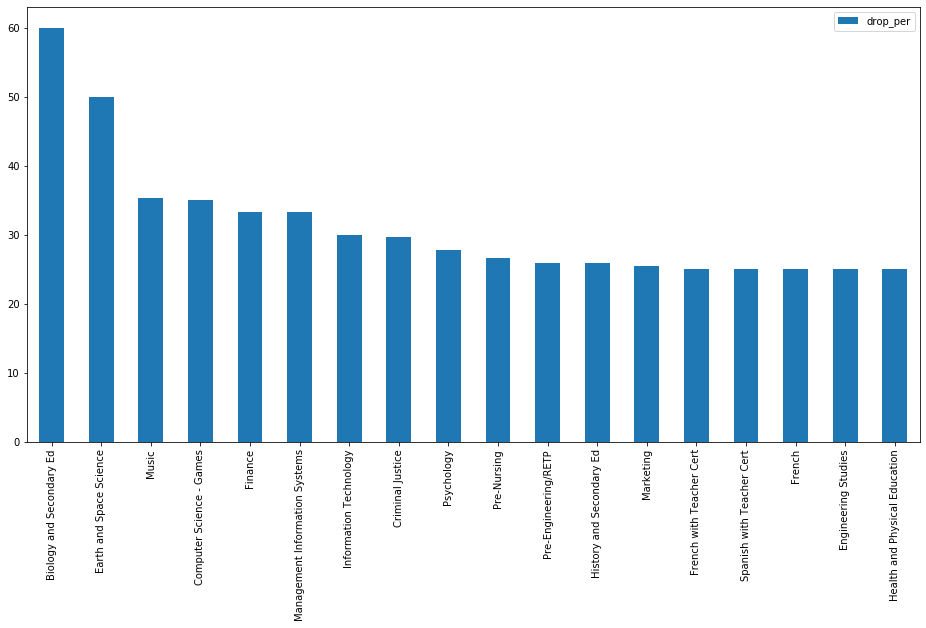

In [1282]:
df_test[["drop_per"]].plot(kind="bar",figsize=(16,8),legend=True)

# Transforming Student Major to Ordinal Category

In [1284]:
_3=df_test[df_test["drop_per"]>=30]
_2=df_test[(df_test["drop_per"]>=20) & (df_test["drop_per"]<30)]
_1=df_test[df_test["drop_per"]<20]

In [1285]:
_3=list(_3.index)
_2=list(_2.index)
_1=list(_1.index)

# _3-Sub Majors with more than 30% student drop rate
# _2-Sub Majors with 20-30 % student drop rate
# _3-Sub Majors with below 20% student drop rate

In [1292]:
_3

['Biology and Secondary Ed',
 'Earth and Space Science',
 'Music',
 'Computer Science - Games',
 'Finance',
 'Management Information Systems',
 'Information Technology']

In [1293]:
_2

['Criminal Justice',
 'Psychology',
 'Pre-Nursing',
 'Pre-Engineering/RETP',
 'History and Secondary Ed',
 'Marketing',
 'French with Teacher Cert',
 'Spanish with Teacher Cert',
 'French',
 'Engineering Studies',
 'Health and Physical Education']

# PCA 

In [1258]:
df=df.drop(columns=["CORE_COURSE_GRADE_6_S","CORE_COURSE_GRADE_6_F","CORE_COURSE_GRADE_5_S","CORE_COURSE_GRADE_5_F","CORE_COURSE_GRADE_4_F"])

In [395]:
a=pd.get_dummies(df["STDNT_BACKGROUND"])

In [396]:
df=pd.concat([df,a],axis=1)

In [397]:
from sklearn.decomposition import PCA

In [398]:
pca=PCA(n_components=1)

In [399]:
p=pca.fit(df[["BGD 1","BGD 2","BGD 3","BGD 4","BGD 5","BGD 6","BGD 7","BGD 8"]])
p=pca.transform(df[["BGD 1","BGD 2","BGD 3","BGD 4","BGD 5","BGD 6","BGD 7","BGD 8"]])
pca.explained_variance_ratio_

array([0.71947465])

In [400]:
pca.components_

array([[-0.74608165,  0.02330026,  0.66437619,  0.03140018,  0.00162822,
         0.02046201,  0.00389946,  0.00101534]])

In [401]:
df["Background"]=p

In [402]:
df.drop(columns=["BGD 1","BGD 2","BGD 3","BGD 4","BGD 5","BGD 6","BGD 7","BGD 8"],inplace=True)

In [403]:
df["IN_STATE_FLAG"]=df["IN_STATE_FLAG"].replace({"Y":1,"N":0})

In [404]:
df["INTERNATIONAL_STS"]=df["INTERNATIONAL_STS"].replace({"Y":1,"N":0})

**Female-1,Male-0

In [405]:
df["STDNT_GENDER"]=df["STDNT_GENDER"].replace({"F":1,"M":0})

In [406]:
df["DEGREE_GROUP_CD"].value_counts()

B    3384
A      12
V       4
Name: DEGREE_GROUP_CD, dtype: int64

In [407]:
df["DEGREE_GROUP_DESC"].value_counts()

Bachelors           3384
Associate             12
Career Associate       4
Name: DEGREE_GROUP_DESC, dtype: int64

# Drop Column Degree Group

In [408]:
df.drop(columns=["DEGREE_GROUP_DESC"],inplace=True)

In [409]:
df.drop(columns=["DEGREE_GROUP_CD"],inplace=True)

In [410]:
df["HOUSING_STS"].value_counts()

Off Campus    1981
On Campus     1419
Name: HOUSING_STS, dtype: int64

In [411]:
df["HOUSING_STS"]=df["HOUSING_STS"].replace({"Off Campus":0,"On Campus":1})

** On Campus-1,Off Campus-0

In [412]:
df_new=df.drop(columns=["MOTHER_HI_EDU_DESC","FATHER_HI_EDU_DESC","HIGH_SCHL_NAME","STDNT_BACKGROUND"])

# Dropping Students Minor Column

In [413]:
df_new.drop(columns=["STDNT_MINOR"],inplace=True)

# Dropping Student Entrance 1 , 2 Columns

In [414]:
df_new.drop(columns=["STDNT_TEST_ENTRANCE1","STDNT_TEST_ENTRANCE2"],inplace=True)

# Binning the data in student major column

In [425]:
df_new["STDNT_MAJOR"]=df_new["STDNT_MAJOR"].apply(lambda x : 3 if x in _3 else 2 if x in _2 else 1 )

# Dropping the 1st term and 2nd term column

In [426]:
df_new.drop(columns=["FIRST_TERM","SECOND_TERM"],inplace=True)

In [427]:
df_new.drop(columns=["CORE_COURSE_NAME_6_F","CORE_COURSE_NAME_5_F","CORE_COURSE_NAME_6_S",
                    "CORE_COURSE_NAME_5_S","CORE_COURSE_NAME_4_S"],inplace=True)

In [428]:
df_new.drop(columns=["CORE_COURSE_GRADE_4_S"],inplace=True)

# Checking if is there any particalar course for which students are dropping out

In [430]:
df_new["RETURNED_2ND_YR"].value_counts()

1    2677
0     723
Name: RETURNED_2ND_YR, dtype: int64

In [431]:
df_new["CORE_COURSE_NAME_3_F"].value_counts()

ENGL 1101    568
HIST 2111    176
MATH 1111    162
COMM 1110    158
POLS 1101    140
            ... 
ENGL 2111      1
ENGL 2136      1
PHYS 2211      1
MATH 2115      1
ANTH 1107      1
Name: CORE_COURSE_NAME_3_F, Length: 74, dtype: int64

# There seems to be no such conclusion as the dropping percent for each course is nearly same as for the total dataset

In [432]:
df_new.drop(columns=["CORE_COURSE_NAME_1_F","CORE_COURSE_NAME_2_F","CORE_COURSE_NAME_3_F",
            "CORE_COURSE_NAME_4_F","CORE_COURSE_NAME_1_S","CORE_COURSE_NAME_2_S",
            "CORE_COURSE_NAME_3_S"],inplace=True)

In [433]:
df_new.drop(columns=["STUDENT IDENTIFIER"],inplace=True)

In [434]:
X=df_new.drop(columns=["RETURNED_2ND_YR"])

In [435]:
y=df_new["RETURNED_2ND_YR"]

# EDA After Oversampling- Generating Systhetic Data

In [616]:
from sklearn.model_selection import train_test_split

In [436]:
columns=["CORE_COURSE_GRADE_2_F","CORE_COURSE_GRADE_3_F",
        "CORE_COURSE_GRADE_4_F","CORE_COURSE_GRADE_1_S","CORE_COURSE_GRADE_2_S",
        "CORE_COURSE_GRADE_3_S"]

In [437]:
for i in columns:
    X[i]=X[i].replace(np.nan,df[i].mean())

In [834]:
sm=SMOTE(k_neighbors=5)

In [844]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.08)

In [845]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.15)

In [846]:
X_train,Y_train=sm.fit_resample(X_train,Y_train)

In [850]:
c=pd.concat([X_train,Y_train],axis=1)

In [851]:
c_dropped=c[c["RETURNED_2ND_YR"]==0]

In [852]:
c_continued=c[c["RETURNED_2ND_YR"]==1]

# Distributions

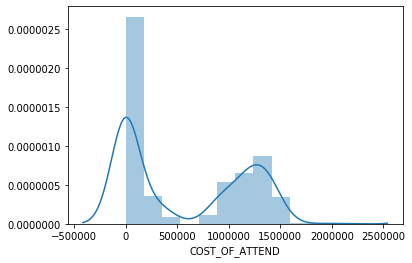

In [853]:
sns.distplot(c_dropped_s["COST_OF_ATTEND"])

In [854]:
c

,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_TEST_ENTRANCE_COMB,CORE_COURSE_GRADE_1_F,CORE_COURSE_GRADE_2_F,CORE_COURSE_GRADE_3_F,CORE_COURSE_GRADE_4_F,...,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,Background,RETURNED_2ND_YR
0,18,1,1,0,1,1070.000000,3,3.000000,5.000000,4.491958,...,12,12,12.000000,12.000000,619440,1201500,582060,208200.000000,-0.476868,1
1,18,0,1,0,1,997.758501,3,4.000000,4.000000,5.000000,...,17,17,16.000000,16.000000,0,0,0,0.000000,-0.476868,1
2,18,0,1,0,2,950.000000,4,4.000000,4.000000,4.491958,...,12,12,14.285848,12.511125,0,1245480,2925960,-217920.000000,0.292514,0
3,18,1,1,0,2,870.000000,4,4.000000,5.000000,4.491958,...,16,13,12.000000,12.000000,852060,1176420,324360,395400.000000,0.933590,1
4,18,1,1,0,1,910.000000,3,3.000000,4.000000,4.000000,...,13,13,13.000000,9.000000,0,0,0,0.000000,0.933590,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4185,18,1,1,0,1,1070.000000,3,4.000000,4.000000,4.403233,...,14,12,17.806465,17.806465,0,0,0,0.000000,-0.476868,0
4186,18,0,1,0,2,1380.000000,4,4.758898,4.056523,4.372053,...,15,15,14.839265,14.839265,0,0,0,0.000000,0.228071,0
4187,18,1,1,0,1,904.980709,2,2.125482,3.125482,4.430226,...,14,11,13.749035,13.749035,1147075,1147075,0,469876.646608,-0.380324,0
4188,18,0,0,0,2,950.000000,4,4.000000,4.196659,5.000000,...,15,15,15.196659,15.196659,0,0,0,0.000000,-0.476868,0


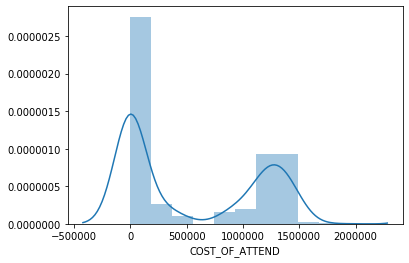

In [855]:
sns.distplot(c_continued_s["COST_OF_ATTEND"])

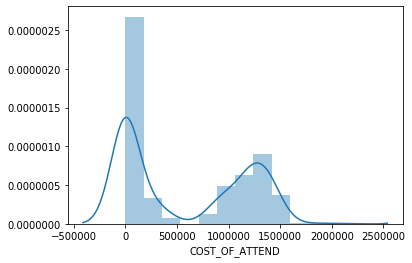

In [856]:
sns.distplot(c_dropped["COST_OF_ATTEND"])

In [857]:
c["CORE_COURSE_GRADE_1_S"].value_counts()

3.000000    736
4.000000    734
2.000000    436
1.000000    414
3.016098    309
           ... 
3.159082      1
2.671481      1
1.789046      1
3.608942      1
3.191289      1
Name: CORE_COURSE_GRADE_1_S, Length: 1199, dtype: int64

# The distribution is not a normal distribution

# Anova Test

In [866]:
columns=['STDNT_AGE',
 'STDNT_GENDER',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'STDNT_TEST_ENTRANCE_COMB',
 'CORE_COURSE_GRADE_1_F',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_GRADE_4_F',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_GRADE_2_S',
 'CORE_COURSE_GRADE_3_S',
 'HOUSING_STS',
 'DISTANCE_FROM_HOME',
 'HIGH_SCHL_GPA',
 'FATHER_HI_EDU_CD',
 'MOTHER_HI_EDU_CD',
 'FIRST_TERM_ATTEMPT_HRS',
 'FIRST_TERM_EARNED_HRS',
 'SECOND_TERM_ATTEMPT_HRS',
 'SECOND_TERM_EARNED_HRS',
 'GROSS_FIN_NEED',
 'COST_OF_ATTEND',
 'EST_FAM_CONTRIBUTION',
 'UNMET_NEED',
 'Background']

# Checking for Categorial and Continuous Variables

In [867]:
Categorial_variables=[]
for i in columns:
    if len(c[i].value_counts())<10:
        Categorial_variables.append(i)
        print(c[i].value_counts())

1    2349
0    1841
Name: STDNT_GENDER, dtype: int64
1    3554
0     636
Name: IN_STATE_FLAG, dtype: int64
0    4162
1      28
Name: INTERNATIONAL_STS, dtype: int64
2    2832
1    1251
3     107
Name: STDNT_MAJOR, dtype: int64
3    1205
2     896
4     881
1     735
5     296
0     177
Name: CORE_COURSE_GRADE_1_F, dtype: int64
0    2659
1    1531
Name: HOUSING_STS, dtype: int64


In [868]:
Categorial_variables

['STDNT_GENDER',
 'IN_STATE_FLAG',
 'INTERNATIONAL_STS',
 'STDNT_MAJOR',
 'CORE_COURSE_GRADE_1_F',
 'HOUSING_STS']

In [869]:
Continuous_variables=[]
for i in columns:
    if len(c[i].value_counts())>=10:
        Continuous_variables.append(i)
        print(c[i].value_counts())

18    3460
17     506
19     172
16      21
20      14
22       5
21       5
25       3
23       2
26       1
24       1
Name: STDNT_AGE, dtype: int64
997.758501     534
950.000000     392
910.000000     310
990.000000     305
870.000000     263
              ... 
870.821370       1
1245.426535      1
1089.576633      1
1019.549854      1
1298.523085      1
Name: STDNT_TEST_ENTRANCE_COMB, Length: 936, dtype: int64
4.000000    1228
3.000000     761
5.000000     635
2.000000     261
1.000000     130
            ... 
2.180834       1
2.791832       1
4.659964       1
3.146443       1
2.993402       1
Name: CORE_COURSE_GRADE_2_F, Length: 1099, dtype: int64
4.000000    1083
5.000000    1008
4.148854     462
3.000000     382
2.000000      88
            ... 
4.097181       1
4.299823       1
4.078417       1
2.791832       1
4.310443       1
Name: CORE_COURSE_GRADE_3_F, Length: 1145, dtype: int64
4.491958    1600
5.000000     983
4.000000     469
3.000000     120
2.000000      23
           

In [870]:
Continuous_variables

['STDNT_AGE',
 'STDNT_TEST_ENTRANCE_COMB',
 'CORE_COURSE_GRADE_2_F',
 'CORE_COURSE_GRADE_3_F',
 'CORE_COURSE_GRADE_4_F',
 'CORE_COURSE_GRADE_1_S',
 'CORE_COURSE_GRADE_2_S',
 'CORE_COURSE_GRADE_3_S',
 'DISTANCE_FROM_HOME',
 'HIGH_SCHL_GPA',
 'FATHER_HI_EDU_CD',
 'MOTHER_HI_EDU_CD',
 'FIRST_TERM_ATTEMPT_HRS',
 'FIRST_TERM_EARNED_HRS',
 'SECOND_TERM_ATTEMPT_HRS',
 'SECOND_TERM_EARNED_HRS',
 'GROSS_FIN_NEED',
 'COST_OF_ATTEND',
 'EST_FAM_CONTRIBUTION',
 'UNMET_NEED',
 'Background']

# Anova Test

In [899]:
for i in Continuous_variables:
    a=c_dropped[i].sample(500)
    b=c_continued[i].sample(500)
    stat, p = f_oneway(a,b)
    if stat>=3:
        print(i,"","stat-",stat,"p_value-",p)

STDNT_AGE  stat- 3.708750371618274 p_value- 0.054411731298648715
CORE_COURSE_GRADE_2_F  stat- 54.26680953334031 p_value- 3.662197040512304e-13
CORE_COURSE_GRADE_3_F  stat- 23.01029725322725 p_value- 1.8569223320494192e-06
CORE_COURSE_GRADE_4_F  stat- 16.294532247742197 p_value- 5.836873345565809e-05
CORE_COURSE_GRADE_1_S  stat- 30.71830140929578 p_value- 3.817711022890872e-08
CORE_COURSE_GRADE_2_S  stat- 43.970110881024915 p_value- 5.452885985841457e-11
CORE_COURSE_GRADE_3_S  stat- 45.11468589389875 p_value- 3.1159331397862223e-11
FATHER_HI_EDU_CD  stat- 8.981966293058392 p_value- 0.002794034173770532
FIRST_TERM_ATTEMPT_HRS  stat- 10.19632691792629 p_value- 0.0014512431052372363
FIRST_TERM_EARNED_HRS  stat- 8.85838748869716 p_value- 0.002987821700534346
SECOND_TERM_ATTEMPT_HRS  stat- 4.096492354961983 p_value- 0.043238299145251874
SECOND_TERM_EARNED_HRS  stat- 24.013990711476687 p_value- 1.115479587030028e-06
Background  stat- 3.321438479868182 p_value- 0.06868109844373728


In [932]:
from scipy.stats import kruskal

In [943]:
for i in Categorial_variables:
    a=c_dropped[i].sample(100)
    b=c_continued[i].sample(100)
    stat, p = kruskal(a,b)
    if p<=0.08:
        print(i,"","stat-",stat,"p_value-",p)

STDNT_GENDER  stat- 5.228243021346407 p_value- 0.02222296982898722
IN_STATE_FLAG  stat- 5.576355496600876 p_value- 0.01820456835055626
CORE_COURSE_GRADE_1_F  stat- 16.51808055755612 p_value- 4.818836331626057e-05


# Above parametes have different distributions for students who left Vs students who continued

# Box Plot

In [873]:
from seaborn import boxplot

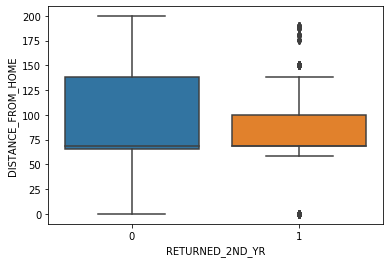

In [874]:
sns.boxplot(c["RETURNED_2ND_YR"],c[c["DISTANCE_FROM_HOME"]<200]["DISTANCE_FROM_HOME"])

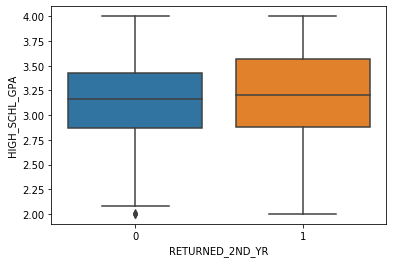

In [875]:
sns.boxplot(c["RETURNED_2ND_YR"],c[c["HIGH_SCHL_GPA"]>=2]["HIGH_SCHL_GPA"])

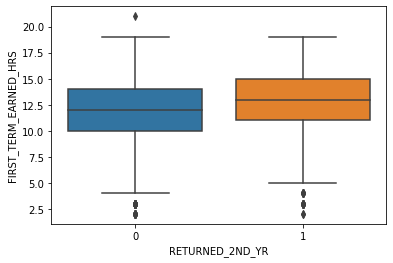

In [876]:
sns.boxplot(c["RETURNED_2ND_YR"],c[c["FIRST_TERM_EARNED_HRS"]>=2]["FIRST_TERM_EARNED_HRS"])

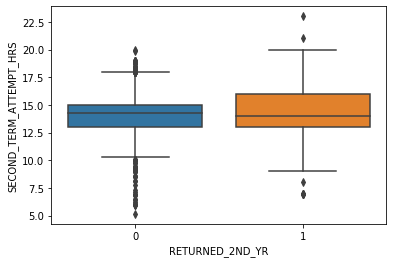

In [877]:
sns.boxplot(c["RETURNED_2ND_YR"],c[c["SECOND_TERM_ATTEMPT_HRS"]>=5]["SECOND_TERM_ATTEMPT_HRS"])

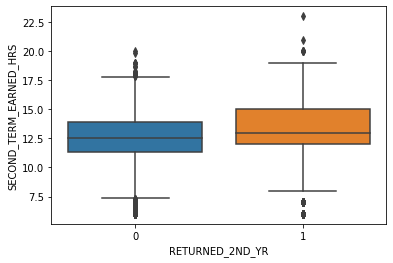

In [878]:
sns.boxplot(c["RETURNED_2ND_YR"],c[c["SECOND_TERM_EARNED_HRS"]>=6]["SECOND_TERM_EARNED_HRS"])

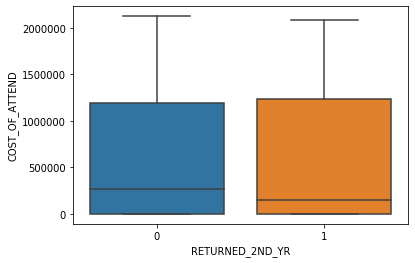

In [880]:
sns.boxplot(c["RETURNED_2ND_YR"],c["COST_OF_ATTEND"])

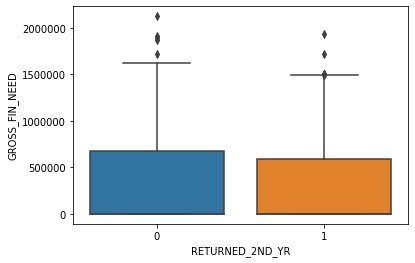

In [881]:
sns.boxplot(c["RETURNED_2ND_YR"],c["GROSS_FIN_NEED"])

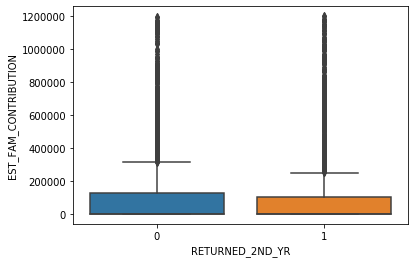

In [882]:
sns.boxplot(c["RETURNED_2ND_YR"],c[c["EST_FAM_CONTRIBUTION"]<=1200000]["EST_FAM_CONTRIBUTION"])

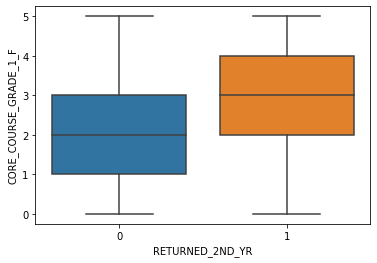

In [884]:
sns.boxplot(c["RETURNED_2ND_YR"],c["CORE_COURSE_GRADE_1_F"])

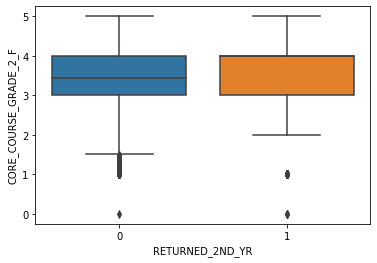

In [886]:
sns.boxplot(c["RETURNED_2ND_YR"],c["CORE_COURSE_GRADE_2_F"])

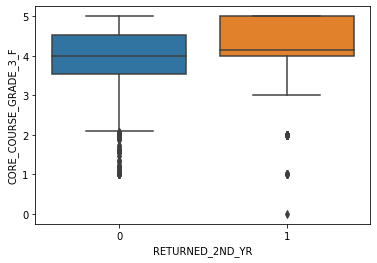

In [888]:
sns.boxplot(c["RETURNED_2ND_YR"],c["CORE_COURSE_GRADE_3_F"])

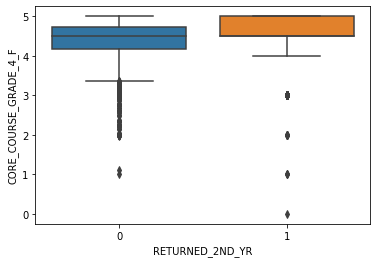

In [890]:
sns.boxplot(c["RETURNED_2ND_YR"],c["CORE_COURSE_GRADE_4_F"])

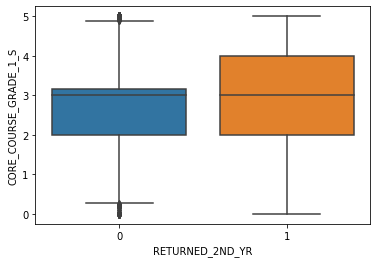

In [892]:
sns.boxplot(c["RETURNED_2ND_YR"],c["CORE_COURSE_GRADE_1_S"])

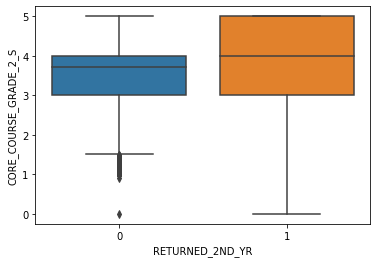

In [894]:
sns.boxplot(c["RETURNED_2ND_YR"],c["CORE_COURSE_GRADE_2_S"])

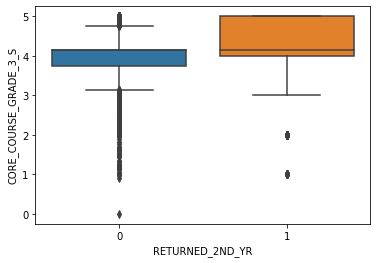

In [896]:
sns.boxplot(c["RETURNED_2ND_YR"],c["CORE_COURSE_GRADE_3_S"])

# Standardizing

In [909]:
columns=["CORE_COURSE_GRADE_2_F","CORE_COURSE_GRADE_3_F",
        "CORE_COURSE_GRADE_4_F","CORE_COURSE_GRADE_1_S","CORE_COURSE_GRADE_2_S",
        "CORE_COURSE_GRADE_3_S"]

In [910]:
for i in columns:
    X[i]=X[i].replace(np.nan,df[i].mean())

In [911]:
sc=StandardScaler()

In [912]:
X[X.columns]=sc.fit_transform(X[X.columns])

In [913]:
from sklearn.model_selection import train_test_split

In [914]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=0.08,random_state=0)

In [915]:
X_train,X_test,Y_train,Y_test=train_test_split(x_train,y_train,test_size=0.15,random_state=0)

# Over Sampling

In [916]:
from imblearn.over_sampling import SMOTE

In [917]:
sm=SMOTE(k_neighbors=6)

In [918]:
X_train,Y_train=sm.fit_resample(X_train,Y_train)

# K Neighbors

In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
kn=KNeighborsClassifier(n_neighbors=5)

In [67]:
kn.fit(X_train,Y_train)

KNeighborsClassifier()

In [68]:
kn.score(X_test,Y_test)

0.5574468085106383

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
params={"n_neighbors":[3,5,6,7,9,11,13,15],"algorithm":["auto","brute"],"weights":["uniform","distance"]}

In [71]:
kn=KNeighborsClassifier()

In [72]:
cv=GridSearchCV(kn,params,scoring="roc_auc")

In [73]:
cv.fit(X_train,Y_train)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'brute'],
                         'n_neighbors': [3, 5, 6, 7, 9, 11, 13, 15],
                         'weights': ['uniform', 'distance']},
             scoring='roc_auc')

In [74]:
kn_model=cv.best_estimator_

In [75]:
kn_model.fit(X_train,Y_train)

KNeighborsClassifier(n_neighbors=9, weights='distance')

In [76]:
kn_model.score(X_test,Y_test)

0.5148936170212766

In [80]:
from sklearn.metrics import confusion_matrix , classification_report , roc_curve , precision_recall_curve,roc_auc_score,precision_score,recall_score

In [82]:
y_predict=kn_model.predict(X_test)

In [83]:
confusion_matrix(Y_test,y_predict)

array([[ 78,  38],
       [190, 164]])

# Dummy Classifier

In [84]:
from sklearn.dummy import DummyClassifier

In [85]:
dm=DummyClassifier(strategy="most_frequent")

In [86]:
dm.fit(X_train,Y_train)

DummyClassifier(strategy='most_frequent')

In [87]:
dm.score(X_test,Y_test)

0.24680851063829787

In [88]:
y=dm.predict(X_test)

In [89]:
confusion_matrix(Y_test,y)

array([[116,   0],
       [354,   0]])

# Random Forest Classifier

In [95]:
from sklearn.ensemble import RandomForestClassifier

In [96]:
rfc=RandomForestClassifier(n_estimators=300,oob_score=True,max_depth=10,max_features=20,)

In [97]:
rfc.fit(X_train,Y_train)

RandomForestClassifier(max_depth=10, max_features=20, n_estimators=300,
                       oob_score=True)

In [98]:
rfc.score(X_test,Y_test)

0.7851063829787234

In [99]:
y_predict=rfc.predict(X_test)

In [100]:
confusion_matrix(Y_test,y_predict)

array([[ 41,  75],
       [ 26, 328]])

In [101]:
Y_test.value_counts()

1    354
0    116
Name: RETURNED_2ND_YR, dtype: int64

In [102]:
rfc.oob_score_

0.8998100664767331

In [103]:
precisions,recalls,thresholds=precision_recall_curve(Y_test,y_predict)

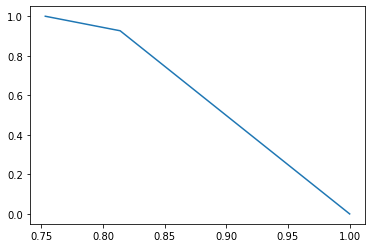

In [104]:
plt.plot(precisions,recalls)

In [105]:
fps,tps,thresholds=roc_curve(Y_test,y_predict)

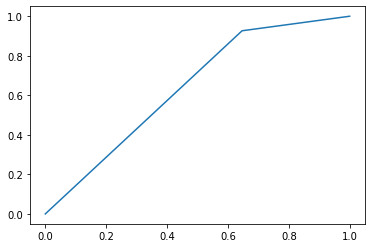

In [106]:
plt.plot(fps,tps)

# Logistic Regression

In [107]:
from sklearn.linear_model import LogisticRegression

In [108]:
lr=LogisticRegression()

In [109]:
params={"C":[1,2,3,4,6,8,9,12,15,20]}

In [110]:
gs=GridSearchCV(lr,params)

In [111]:
gs.fit(X_train,Y_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [1, 2, 3, 4, 6, 8, 9, 12, 15, 20]})

In [112]:
lr_model=gs.best_estimator_

In [113]:
lr_model.fit(X_train,Y_train)

LogisticRegression(C=2)

In [114]:
lr_model.score(X_test,Y_test)

0.6212765957446809

In [115]:
y_predict=lr_model.predict(X_test)

In [116]:
confusion_matrix(Y_test,y_predict)

array([[ 75,  41],
       [137, 217]])

In [117]:
roc_auc_score(Y_test,y_predict)

0.6297730372102084

In [118]:
precisions,recalls,thresholds=precision_recall_curve(Y_test,y_predict)

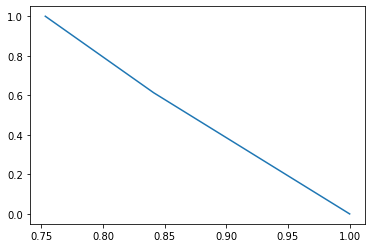

In [119]:
plt.plot(precisions,recalls)

In [120]:
fps,tps,thresholds=roc_curve(Y_test,y_predict)

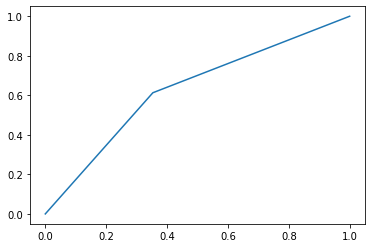

In [121]:
plt.plot(fps,tps)

# Ensemble Techniques

# Bagging Classifier

In [122]:
from sklearn.ensemble import BaggingClassifier

In [123]:
bag_clf=BaggingClassifier(lr_model,n_estimators=100,bootstrap=True)

In [124]:
#bag_clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=LogisticRegression(C=2), n_estimators=100)

In [125]:
bag_clf.score(X_test,Y_test)

0.6234042553191489

In [126]:
y_predict=bag_clf.predict(X_test)

In [127]:
confusion_matrix(Y_test,y_predict)

array([[ 75,  41],
       [136, 218]])

In [128]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.36      0.65      0.46       116
           1       0.84      0.62      0.71       354

    accuracy                           0.62       470
   macro avg       0.60      0.63      0.58       470
weighted avg       0.72      0.62      0.65       470



In [129]:
precisions,recalls,thresholds=precision_recall_curve(Y_test,y_predict)

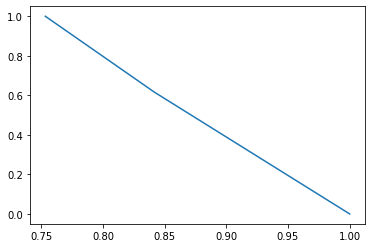

In [130]:
plt.plot(precisions,recalls)

In [131]:
fps,tps,thresholds=roc_curve(Y_test,y_predict)

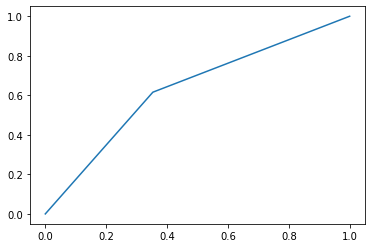

In [132]:
plt.plot(fps,tps)

In [133]:
roc_auc_score(Y_test,y_predict)

0.6311854665887395

In [134]:
bag_clf=BaggingClassifier(svc,n_estimators=100,bootstrap=True)

In [135]:
bag_clf.fit(X_train,Y_train)

BaggingClassifier(base_estimator=SVC(C=500, gamma=0.01), n_estimators=100)

In [136]:
bag_clf.score(X_test,Y_test)

0.6893617021276596

In [137]:
y_predict=bag_clf.predict(X_test)

In [138]:
confusion_matrix(Y_test,y_predict)

array([[ 48,  68],
       [ 78, 276]])

# Adaboost Classifier

In [254]:
from sklearn.ensemble import AdaBoostClassifier

In [273]:
ada=AdaBoostClassifier(n_estimators=300)

In [274]:
ada.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=300)

In [275]:
ada.score(X_test,Y_test)

0.8063829787234043

In [276]:
y_predict=ada.predict(X_test)

In [277]:
confusion_matrix(Y_test,y_predict)

array([[ 49,  67],
       [ 24, 330]])

In [278]:
precision_score(Y_test,y_predict)

0.8312342569269522

In [279]:
recall_score(Y_test,y_predict)

0.9322033898305084

In [280]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.67      0.42      0.52       116
           1       0.83      0.93      0.88       354

    accuracy                           0.81       470
   macro avg       0.75      0.68      0.70       470
weighted avg       0.79      0.81      0.79       470



# Testing on the Test Data for Test Score

In [919]:
ada.score(x_test,y_test)

0.8235294117647058

In [920]:
y_predict=ada.predict(x_test)

In [922]:
confusion_matrix(y_test,y_predict)

array([[ 22,  33],
       [ 15, 202]])

In [923]:
precision_score(y_test,y_predict)

0.8595744680851064

In [924]:
recall_score(y_test,y_predict)

0.9308755760368663

In [925]:
print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.40      0.48        55
           1       0.86      0.93      0.89       217

    accuracy                           0.82       272
   macro avg       0.73      0.67      0.69       272
weighted avg       0.81      0.82      0.81       272



In [926]:
precisions,recalls,thresholds=precision_recall_curve(y_test,y_predict)

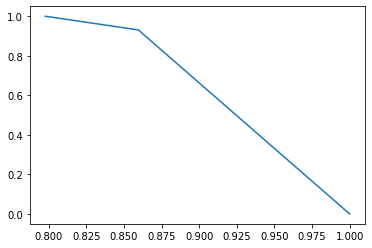

In [928]:
plt.plot(precisions,recalls)

In [929]:
fps,tps,thresholds=roc_curve(y_test,y_predict)

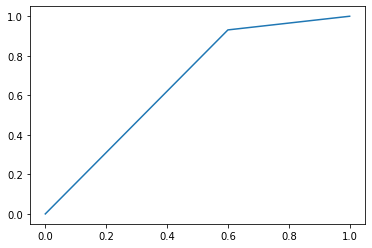

In [930]:
plt.plot(fps,tps)

In [931]:
roc_auc_score(y_test,y_predict)

0.6654377880184332

# Gradient Boosting

In [148]:
from sklearn.ensemble import GradientBoostingClassifier

In [149]:
gbc=GradientBoostingClassifier(n_estimators=100,learning_rate=0.1)

In [150]:
gbc.fit(X_train,Y_train)

GradientBoostingClassifier()

In [151]:
gbc.score(X_test,Y_test)

0.8063829787234043

In [152]:
y_predict=gbc.predict(X_test)

In [153]:
confusion_matrix(Y_test,y_predict)

array([[ 41,  75],
       [ 16, 338]])

In [154]:
df_dropped

,STUDENT IDENTIFIER,STDNT_AGE,STDNT_GENDER,IN_STATE_FLAG,INTERNATIONAL_STS,STDNT_MAJOR,STDNT_TEST_ENTRANCE_COMB,FIRST_TERM,CORE_COURSE_NAME_1_F,CORE_COURSE_GRADE_1_F,...,MOTHER_HI_EDU_CD,FIRST_TERM_ATTEMPT_HRS,FIRST_TERM_EARNED_HRS,SECOND_TERM_ATTEMPT_HRS,SECOND_TERM_EARNED_HRS,GROSS_FIN_NEED,COST_OF_ATTEND,EST_FAM_CONTRIBUTION,UNMET_NEED,Background
0,7808615,18,1,1,0,Undeclared,1150.0,200708,ANTH 1105,5,...,2.571281,16,16,14.000000,14.000000,0,0,0,0.0,-0.476868
11,7884573,18,1,1,0,Undeclared,1070.0,200708,ARTH 1100,5,...,2.000000,16,16,16.000000,16.000000,0,1189920,5163240,-326880.0,-0.476868
17,8004193,17,0,0,0,Biology,1030.0,200908,BIOL 1215K,5,...,2.000000,14,14,14.000000,14.000000,1083000,1324500,241500,476580.0,-0.476868
23,8007842,18,1,1,0,Pre-Nursing,590.0,200808,CHEM 1151,5,...,2.000000,15,15,15.000000,15.000000,0,0,0,0.0,-0.476868
36,7799972,18,1,1,0,Undeclared,640.0,200508,COMM 1110,5,...,2.571281,18,18,14.000000,14.000000,0,0,0,0.0,-0.476868
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3394,7960053,18,1,1,0,Theatre Arts,990.0,201008,ENGL 1101,0,...,2.000000,13,3,14.285848,12.511125,0,0,0,0.0,-0.476868
3395,7948112,18,1,0,0,Music Performance,790.0,200808,COMM 1110,5,...,2.571281,18,18,16.000000,13.000000,0,0,0,0.0,0.300614
3396,8023055,18,1,1,0,Biology,950.0,200708,POLS 1101,4,...,2.571281,13,9,14.285848,12.511125,0,0,0,0.0,-0.476868
3397,7926915,18,1,1,0,Biology,1030.0,200808,ENGL 1101,3,...,2.000000,14,6,14.285848,12.511125,0,945840,1288980,0.0,0.300614


# Feature Testing

In [155]:
a=ada.feature_importances_

In [156]:
t=pd.DataFrame(a)

In [157]:
t["name"]=X_train.columns

In [158]:
t.sort_values(by=0)

,0,name
13,0.00,HOUSING_STS
24,0.00,EST_FAM_CONTRIBUTION
2,0.00,IN_STATE_FLAG
3,0.00,INTERNATIONAL_STS
22,0.00,GROSS_FIN_NEED
17,0.00,MOTHER_HI_EDU_CD
25,0.01,UNMET_NEED
8,0.02,CORE_COURSE_GRADE_3_F
0,0.02,STDNT_AGE
5,0.02,STDNT_TEST_ENTRANCE_COMB


# Performimg Cluster Analysis

In [163]:
from sklearn.cluster import KMeans

In [164]:
km=KMeans(2)

In [165]:
km.fit(X)

KMeans(n_clusters=2)

In [174]:
y=km.predict(X_test)

In [177]:
km.inertia_

80751.81338351962

In [178]:
confusion_matrix(Y_test,y)

array([[ 58,  58],
       [136, 218]])

# Performing PCA on SEM 1 and SEM 2 grades

In [214]:
pca=PCA(n_components=1)
p=pca.fit(X_train[["CORE_COURSE_GRADE_3_S","CORE_COURSE_GRADE_1_S","CORE_COURSE_GRADE_2_S"]])
p=pca.transform(X_train[["CORE_COURSE_GRADE_3_S","CORE_COURSE_GRADE_1_S","CORE_COURSE_GRADE_2_S"]])

In [215]:
pca.explained_variance_ratio_

array([0.79730645])

In [216]:
pca.components_

array([[-0.56438521, -0.55377807, -0.61220844]])

In [218]:
X_train["Sem_1_grades"]=p

In [219]:
pca=PCA(n_components=1)
p1=pca.fit(X_train[["CORE_COURSE_GRADE_1_F","CORE_COURSE_GRADE_2_F","CORE_COURSE_GRADE_3_F","CORE_COURSE_GRADE_4_F"]])
p1=pca.transform(X_train[["CORE_COURSE_GRADE_1_F","CORE_COURSE_GRADE_2_F","CORE_COURSE_GRADE_3_F","CORE_COURSE_GRADE_4_F"]])

In [220]:
pca.explained_variance_ratio_

array([0.69813434])

In [221]:
pca.components_

array([[-0.47871139, -0.54855469, -0.52869821, -0.43635004]])

In [222]:
X_train["Sem_2_grades"]=p1

In [223]:
pca=PCA(n_components=1)
p=pca.fit(X_test[["CORE_COURSE_GRADE_3_S","CORE_COURSE_GRADE_1_S","CORE_COURSE_GRADE_2_S"]])
p=pca.transform(X_test[["CORE_COURSE_GRADE_3_S","CORE_COURSE_GRADE_1_S","CORE_COURSE_GRADE_2_S"]])

In [224]:
X_test["Sem_1_grades"]=p

/Users/lav/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [225]:
pca=PCA(n_components=1)
p1=pca.fit(X_test[["CORE_COURSE_GRADE_1_F","CORE_COURSE_GRADE_2_F","CORE_COURSE_GRADE_3_F","CORE_COURSE_GRADE_4_F"]])
p1=pca.transform(X_test[["CORE_COURSE_GRADE_1_F","CORE_COURSE_GRADE_2_F","CORE_COURSE_GRADE_3_F","CORE_COURSE_GRADE_4_F"]])

In [226]:
X_test["Sem_2_grades"]=p1

/Users/lav/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [281]:
ada.fit(X_train,Y_train)

AdaBoostClassifier(n_estimators=300)

In [282]:
ada.score(X_test,Y_test)

0.8063829787234043

In [283]:
y_predict=ada.predict(X_test)

In [284]:
confusion_matrix(Y_test,y_predict)

array([[ 49,  67],
       [ 24, 330]])

In [238]:
precision_score(Y_test,y_predict)

0.8302872062663186

In [239]:
recall_score(Y_test,y_predict)

0.8983050847457628

In [240]:
print(classification_report(Y_test,y_predict))

              precision    recall  f1-score   support

           0       0.59      0.44      0.50       116
           1       0.83      0.90      0.86       354

    accuracy                           0.79       470
   macro avg       0.71      0.67      0.68       470
weighted avg       0.77      0.79      0.77       470



# It is notable that after performing pca on the sem 1 and sem 2 grades the results don,t change 